<a href="https://colab.research.google.com/github/Samplergithub769/tobacco-use-and-mortality-2004-2015/blob/main/Tobacco_Use_and_Mortality%2C_2004_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

**Load data**

In [192]:
# Load datasets
smokers_df = pd.read_csv("/content/smokers.csv")
prescriptions_df = pd.read_csv("/content/prescriptions.csv")
metrics_df = pd.read_csv("/content/metrics.csv")
fatalities_df = pd.read_csv("/content/fatalities.csv")
admissions_df = pd.read_csv("/content/admissions.csv")

**Display first few rows of each dataset to understand structure**

In [193]:
smokers_df.head()


,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27


In [194]:
prescriptions_df.head()


,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0


In [195]:
metrics_df.head()


,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8


In [196]:
fatalities_df.head()


,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101


In [197]:
admissions_df.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


In [198]:
# Check for missing values in each dataset
print(smokers_df.isnull().sum())
print(prescriptions_df.isnull().sum())
print(metrics_df.isnull().sum())
print(fatalities_df.isnull().sum())
print(admissions_df.isnull().sum())

Year            0
Method          0
Sex            28
16 and Over     0
16-24           0
25-34           0
35-49           0
50-59           0
60 and Over     0
dtype: int64
Year                                                           0
All Pharmacotherapy Prescriptions                              0
Nicotine Replacement Therapy (NRT) Prescriptions               0
Bupropion (Zyban) Prescriptions                                0
Varenicline (Champix) Prescriptions                            2
Net Ingredient Cost of All Pharmacotherapies                   0
Net Ingredient Cost of Nicotine Replacement Therapies (NRT)    0
Net Ingredient Cost of Bupropion (Zyban)                       0
Net Ingredient Cost of Varenicline (Champix)                   2
dtype: int64
Year                                                     0
Tobacco Price\nIndex                                     0
Retail Prices\nIndex                                     0
Tobacco Price Index Relative to Retail Price Index

In [199]:
# Check the column names for any inconsistencies
print(smokers_df.columns)
print(prescriptions_df.columns)
print(metrics_df.columns)
print(fatalities_df.columns)
print(admissions_df.columns)

Index(['Year', 'Method', 'Sex', '16 and Over', '16-24', '25-34', '35-49',
       '50-59', '60 and Over'],
      dtype='object')
Index(['Year', 'All Pharmacotherapy Prescriptions',
       'Nicotine Replacement Therapy (NRT) Prescriptions',
       'Bupropion (Zyban) Prescriptions',
       'Varenicline (Champix) Prescriptions',
       'Net Ingredient Cost of All Pharmacotherapies',
       'Net Ingredient Cost of Nicotine Replacement Therapies (NRT)',
       'Net Ingredient Cost of Bupropion (Zyban)',
       'Net Ingredient Cost of Varenicline (Champix)'],
      dtype='object')
Index(['Year', 'Tobacco Price\nIndex', 'Retail Prices\nIndex',
       'Tobacco Price Index Relative to Retail Price Index',
       'Real Households' Disposable Income', 'Affordability of Tobacco Index',
       'Household Expenditure on Tobacco', 'Household Expenditure Total',
       'Expenditure on Tobacco as a Percentage of Expenditure'],
      dtype='object')
Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagno

**Preprocess: Fix Year formats**

In [200]:
for df in [prescriptions_df, admissions_df]:
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)

# Clean whitespace in column names
metrics_df.columns = metrics_df.columns.str.strip()
fatalities_df.columns = fatalities_df.columns.str.strip()
admissions_df.columns = admissions_df.columns.str.strip()


Clean whitespace in column names

In [201]:
metrics_df.columns = metrics_df.columns.str.strip()
fatalities_df.columns = fatalities_df.columns.str.strip()
admissions_df.columns = admissions_df.columns.str.strip()

**Aggregate each dataset**

In [202]:
#Smokers: avg across age groups
age_cols = ['16 and Over', '16-24', '25-34', '35-49', '50-59', '60 and Over']
smokers_df[age_cols] = smokers_df[age_cols].apply(pd.to_numeric, errors='coerce')
smokers_df['Avg_Smoking_Rate'] = smokers_df[age_cols].mean(axis=1)
smoker_summary = smokers_df.groupby('Year')['Avg_Smoking_Rate'].mean().reset_index()

In [203]:
# --- Prescriptions: total prescriptions
prescription_cols = [
    'All Pharmacotherapy Prescriptions',
    'Nicotine Replacement Therapy (NRT) Prescriptions',
    'Bupropion (Zyban) Prescriptions',
    'Varenicline (Champix) Prescriptions'
]
prescriptions_df[prescription_cols] = prescriptions_df[prescription_cols].apply(pd.to_numeric, errors='coerce')
prescriptions_df['Total_Prescriptions'] = prescriptions_df[prescription_cols].sum(axis=1)
prescription_summary = prescriptions_df[['Year', 'Total_Prescriptions']]

In [204]:
# --- Metrics: keep selected columns
metrics_summary = metrics_df[[
    'Year',
    'Tobacco Price Index Relative to Retail Price Index',
    'Affordability of Tobacco Index',
    'Expenditure on Tobacco as a Percentage of Expenditure'
]].copy()
metrics_summary.columns = ['Year', 'Price_Index_Relative', 'Affordability_Index', 'Tobacco_Spending_Percent']


In [205]:
# --- Fatalities: filter for "All deaths which can be caused by smoking"
fatal_df = fatalities_df[
    fatalities_df['Diagnosis Type'] == 'All deaths which can be caused by smoking'
]
fatal_df['Value'] = pd.to_numeric(fatal_df['Value'], errors='coerce')
fatal_summary = fatal_df.groupby('Year')['Value'].sum().reset_index()
fatal_summary.columns = ['Year', 'Fatalities']

<ipython-input-205-816ee535e846>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['Value'] = pd.to_numeric(fatal_df['Value'], errors='coerce')


In [206]:
# --- Admissions: filter for "All diseases which can be caused by smoking"
adm_df = admissions_df[
    admissions_df['Diagnosis Type'] == 'All diseases which can be caused by smoking'
]
adm_df['Value'] = pd.to_numeric(adm_df['Value'], errors='coerce')
admission_summary = adm_df.groupby('Year')['Value'].sum().reset_index()
admission_summary.columns = ['Year', 'Total_Admissions']

<ipython-input-206-50852fb87524>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm_df['Value'] = pd.to_numeric(adm_df['Value'], errors='coerce')


**Merge datasets**

In [207]:
df = fatal_summary \
    .merge(smoker_summary, on='Year', how='left') \
    .merge(prescription_summary, on='Year', how='left') \
    .merge(metrics_summary, on='Year', how='left') \
    .merge(admission_summary, on='Year', how='left')

df.dropna(inplace=True)

**Model: XGBoost Regressor**

In [208]:
features = ['Avg_Smoking_Rate', 'Total_Prescriptions', 'Price_Index_Relative',
            'Affordability_Index', 'Tobacco_Spending_Percent', 'Total_Admissions']
target = 'Fatalities'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

**Evaluation**

In [209]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 264796480.0
R² Score: 0.8347970247268677


**Plot: Actual vs Predicted**

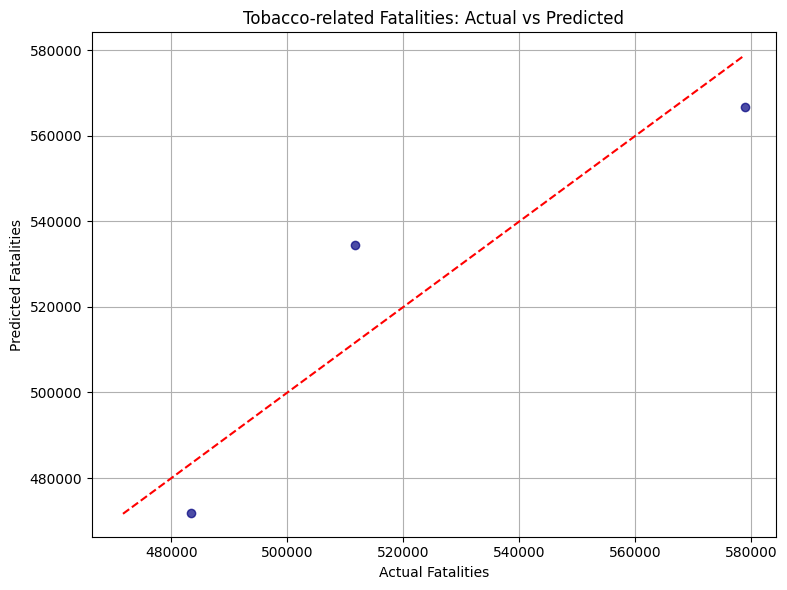

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='navy', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Tobacco-related Fatalities: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot: Feature Importance**


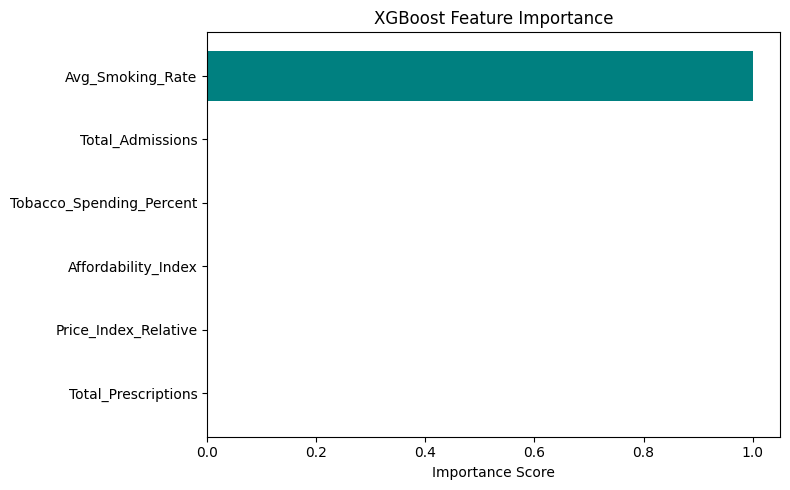

In [211]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), importances[sorted_idx], color='teal')
plt.yticks(range(len(importances)), [features[i] for i in sorted_idx])
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


**Plot: Residuals**

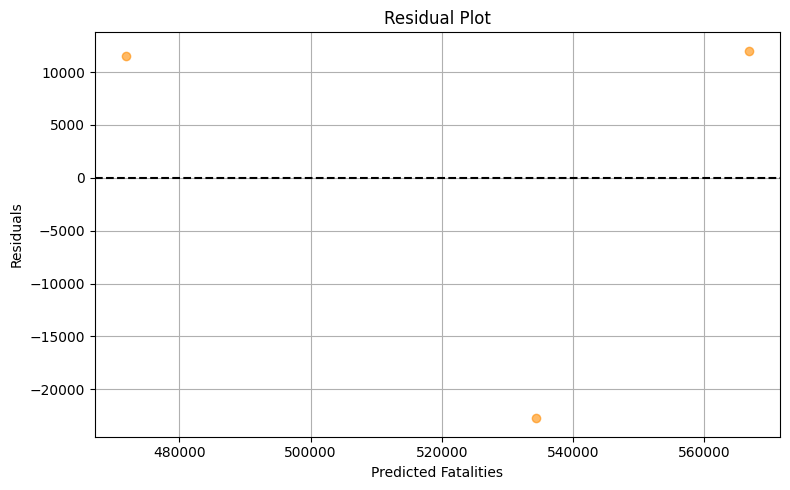

In [212]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='darkorange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Fatalities")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot: Time Series of Fatalities and Smoking Rate**

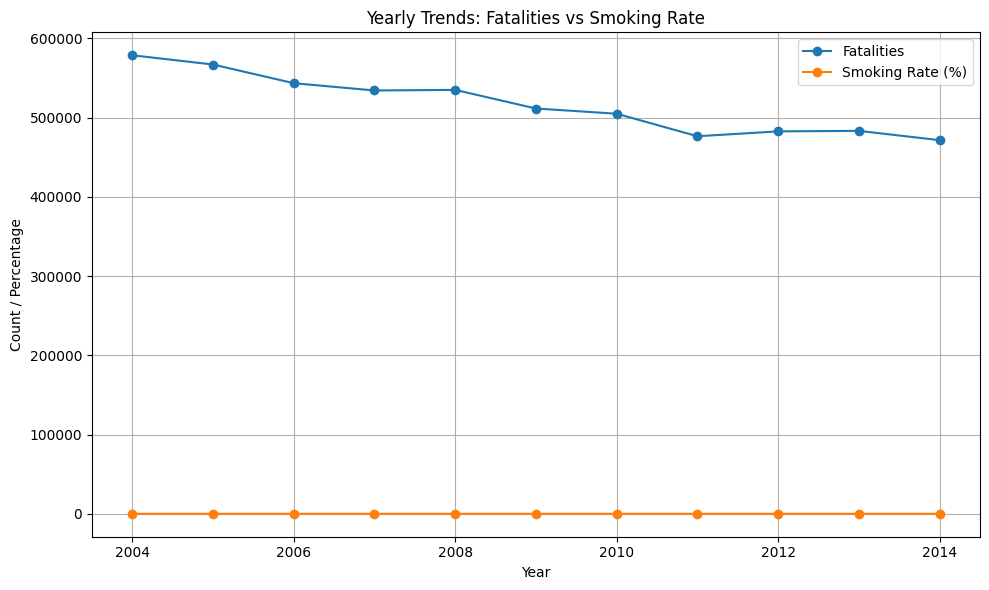

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fatalities'], marker='o', label='Fatalities')
plt.plot(df['Year'], df['Avg_Smoking_Rate'], marker='o', label='Smoking Rate (%)')
plt.title("Yearly Trends: Fatalities vs Smoking Rate")
plt.xlabel("Year")
plt.ylabel("Count / Percentage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Plot: Tobacco Spending vs Affordability Index**

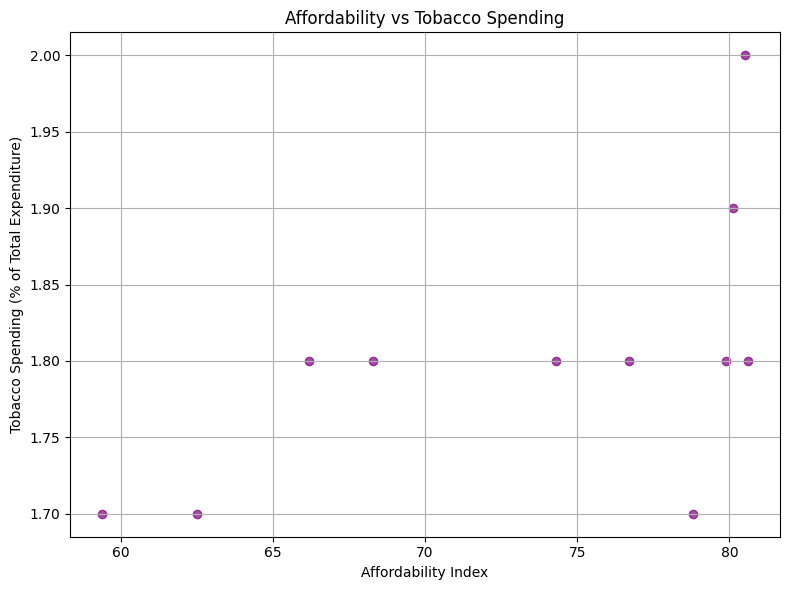

In [214]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Affordability_Index'], df['Tobacco_Spending_Percent'], c='purple', alpha=0.7)
plt.xlabel("Affordability Index")
plt.ylabel("Tobacco Spending (% of Total Expenditure)")
plt.title("Affordability vs Tobacco Spending")
plt.grid(True)
plt.tight_layout()
plt.show()

**Correlation Heatmap**

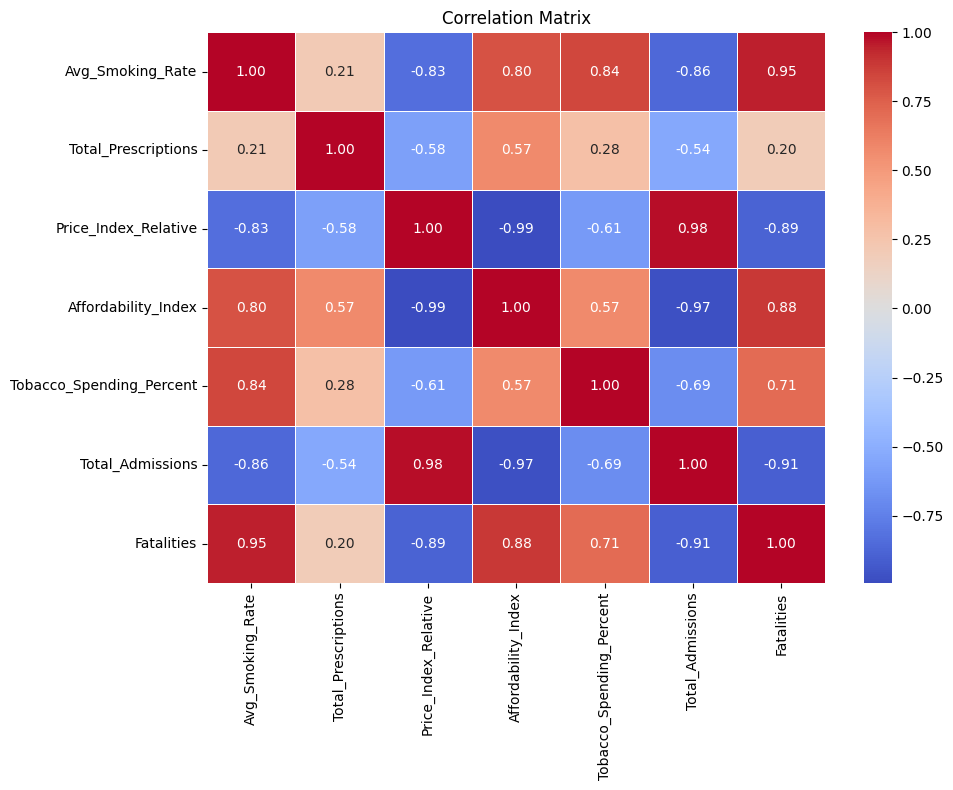

In [215]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = df[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()